# 时间序列测试

In [1]:
# 数据接口 
import akshare as ak
import baostock as bs
import tushare as ts

# 基础模块
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time

# 时间序列模块
import statsmodels
import pmdarima as pm

# 基础函数
import utilsJ

### 读取数据

In [2]:
df = pd.read_csv('000001.SZ.csv', converters={'trade_date':lambda x:pd.to_datetime(x)})

### EDA

d:\Anaconda\envs\py38\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


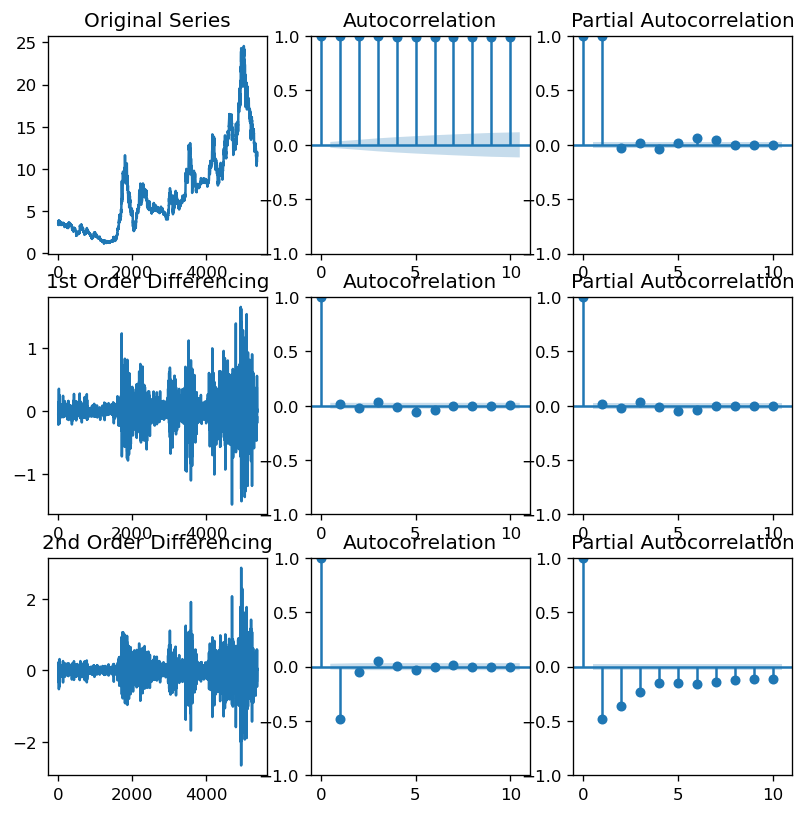

In [3]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.rcParams.update({'figure.figsize':(8,8), 'figure.dpi':120})
# Original Series
fig, axes = plt.subplots(3, 3)
axes[0, 0].plot(df.close); axes[0, 0].set_title('Original Series')
plot_acf(df.close, lags=10, ax=axes[0, 1])
plot_pacf(df.close, lags=10, ax=axes[0, 2])

# 1st Differencing
axes[1, 0].plot(df.close.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df.close.diff().dropna(), lags=10, ax=axes[1, 1])
plot_pacf(df.close.diff().dropna(), lags=10, ax=axes[1, 2])

# 2nd Differencing
axes[2, 0].plot(df.close.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df.close.diff().diff().dropna(), lags=10, ax=axes[2, 1])
plot_pacf(df.close.diff().diff().dropna(), lags=10, ax=axes[2, 2])

plt.show()

### ARIMA 模型

In [4]:
model = pm.auto_arima(df.close, start_p=1, start_q=1,
                      information_criterion='aic',
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=5, max_q=5, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1818.311, Time=3.33 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1815.750, Time=0.35 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1815.870, Time=0.46 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-1815.960, Time=0.41 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1817.457, Time=0.18 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-1817.071, Time=2.28 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-1816.991, Time=1.57 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-1816.329, Time=0.66 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-1815.969, Time=0.30 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1814.442, Time=2.62 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-1820.026, Time=0.58 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-1817.679, Time=0.11 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-1817.589, Time=0.22 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-1818.779, Time=0.74 sec
 ARIMA(1,1,2)(0,0,0